In [12]:
#yolov8

import pandas as pd

# Replace the path with your actual file path
file_path = '/Users/rupakraut/Documents/img-det-benchmark/confidence_scores/detections_v8.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v8_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object
print(mean_confidence_v8_df)

          Object  Confidence
0           bowl    0.264158
1            car    0.388238
2     cell phone    0.353800
3          chair    0.391826
4          couch    0.321272
5            cup    0.579940
6   dining table    0.285735
7        frisbee    0.252692
8     hair drier    0.379401
9         laptop    0.522793
10     microwave    0.275166
11        person    0.942210
12        remote    0.667539


In [13]:
#yolov5

import pandas as pd

# Replace the path with your actual file path
file_path = '/Users/rupakraut/Documents/img-det-benchmark/confidence_scores/detections_v5.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v5_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object
print(mean_confidence_v5_df)

         Object  Confidence
0          bowl    0.288081
1    cell phone    0.361433
2         chair    0.313663
3         couch    0.310346
4           cup    0.513389
5  dining table    0.279644
6    hair drier    0.350877
7        laptop    0.409379
8        person    0.923277
9        remote    0.511184


In [14]:
#yolov3

import pandas as pd

# Replace the path with your actual file path
file_path = '/Users/rupakraut/Documents/img-det-benchmark/confidence_scores/detections_v3.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v3_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object
print(mean_confidence_v3_df)

         Object  Confidence
0    cell phone    0.336108
1         chair    0.405687
2         couch    0.496526
3           cup    0.408416
4  dining table    0.578280
5    hair drier    0.369571
6        laptop    0.388864
7        person    0.948142
8        remote    0.538192


In [23]:
import pandas as pd

df1 = mean_confidence_v8_df
df2 = mean_confidence_v5_df
df3 = mean_confidence_v3_df

# Identify unique objects across all dataframes
unique_objects = pd.unique(df1['Object'].tolist() + df2['Object'].tolist() + df3['Object'].tolist())

# Create a new dataframe with unique objects
combined_df = pd.DataFrame(unique_objects, columns=['Object'])

# Merge the original dataframes with the new dataframe
combined_df = combined_df.merge(df1, on='Object', how='left').rename(columns={'Confidence': 'Confidence_1'})
combined_df = combined_df.merge(df2, on='Object', how='left').rename(columns={'Confidence': 'Confidence_2'})
combined_df = combined_df.merge(df3, on='Object', how='left').rename(columns={'Confidence': 'Confidence_3'})
combined_df = combined_df.fillna(0)

# Now combined_df has one column for objects and three columns for confidences


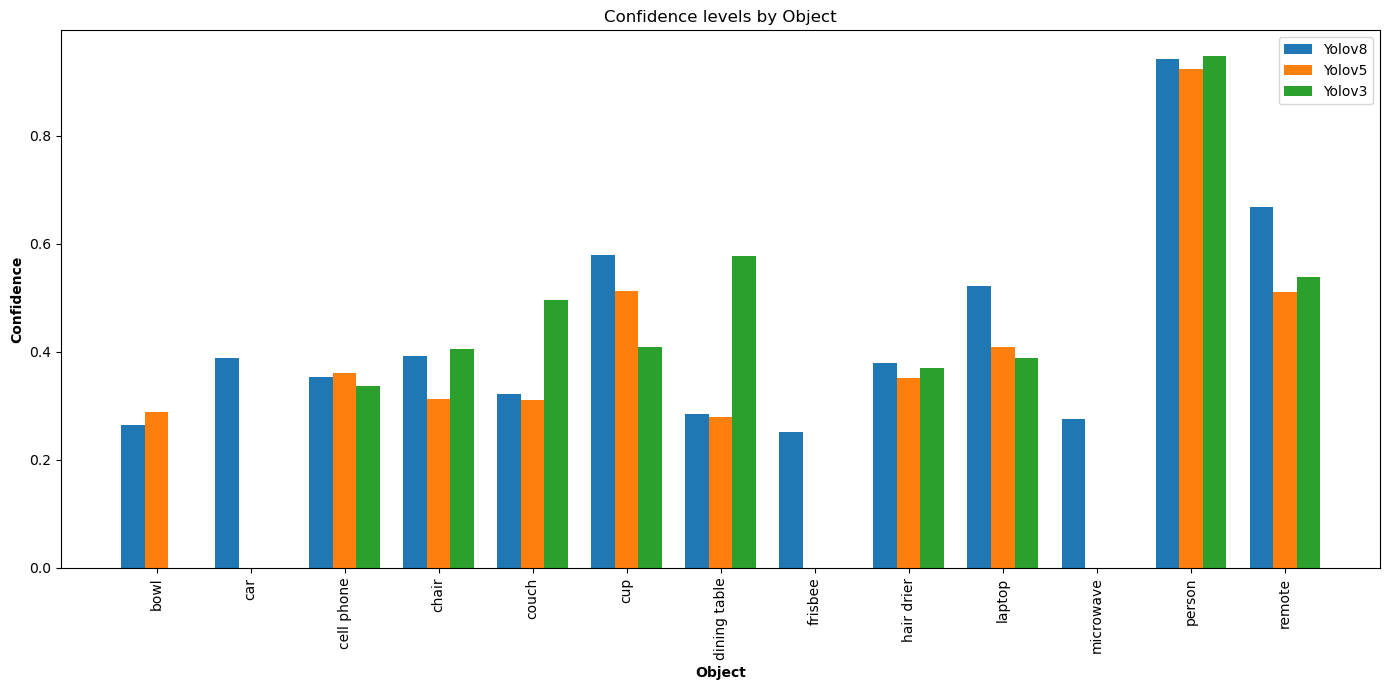

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size for better readability
plt.figure(figsize=(14, 7))

# Define the width of the bars
bar_width = 0.25

# Get the positions of the bars on the x-axis
index = np.arange(len(combined_df))

# Plotting the bars for each confidence
plt.bar(index, combined_df['Confidence_1'], width=bar_width, label='Yolov8')
plt.bar(index + bar_width, combined_df['Confidence_2'], width=bar_width, label='Yolov5')
plt.bar(index + 2*bar_width, combined_df['Confidence_3'], width=bar_width, label='Yolov3')

# Add labels to the x-axis for each group of bars
plt.xlabel('Object', fontweight='bold')
plt.xticks(index + bar_width, combined_df['Object'], rotation=90)

# Add labels and title
plt.ylabel('Confidence', fontweight='bold')
plt.title('Confidence levels by Object')

# Create a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()
